In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('weatherAUS.csv')

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
categorical= df.select_dtypes(include=['object']).columns
print("Categorical: ", list(categorical))

numerical = df.select_dtypes(include=['number']).columns
print("Numerical: ", list(numerical))

Categorical:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Obsłuzymy brakujące wartości – RainTomorrow i RainToday.
Są to wartości binarne, więc trudno je zastąpić innymi wartościami.

In [7]:
df.dropna(axis=0, subset=['RainToday','RainTomorrow'], inplace=True) 
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [8]:
# Dodajemy kolumnę z miesiącem, dla ułatwienia.

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,12


Tera zajmiemy się brakującymi wartościami kategorycznymi.

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,12


In [10]:
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month'],
      dtype='object')


In [11]:
modes = df[categorical[2:5]].apply(pd.Series.mode).to_dict("list")
modes = {i:modes[i][0] for i in modes}

df_cat = df[categorical].dropna()
loc_cat = df_cat.groupby(['Location'])[categorical[2:5]].agg(pd.Series.mode)
del df_cat
print(loc_cat.shape[0], df.Location.nunique())
loc_cat.T

47 49


Location,Adelaide,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
WindGustDir,WSW,W,ESE,E,N,SSE,E,SE,NW,SW,...,ENE,NW,E,ENE,SE,N,WNW,SSE,NE,SSE
WindDir9am,NNE,SE,ESE,SW,N,SSE,SW,SSE,NNW,NE,...,SE,NW,E,E,NW,ENE,WNW,SE,SW,SE
WindDir3pm,WSW,W,ESE,"[E, NNE]",N,N,ENE,SE,WNW,SW,...,ENE,NW,E,WSW,SSE,SSW,SE,SSE,NE,SSW


Widzimy, ze nie mamy dwoch lokalizacji - to znaczy ze maja one wartosc NaN w conajmniej jednej kolumnie. 

In [12]:
missing_locations = list(set(df.Location.unique().tolist()) - set(loc_cat.index.tolist()))
print(missing_locations)

#Zastąpimy wartości NaN w tych kolumnach modą (najczęściej występującą wartością) dla całej ramki danych — tam, gdzie jest to potrzebne.

['Albany', 'Newcastle']


In [13]:
for loc in missing_locations:
    x = df[df['Location'] == loc][categorical[2:5]].apply(pd.Series.mode)
    x.fillna(modes, inplace = True)
    x.index = [loc]
    loc_cat = pd.concat([loc_cat, x], axis = 0)
loc_cat.T

,Adelaide,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,Albany,Newcastle
WindGustDir,WSW,W,ESE,E,N,SSE,E,SE,NW,SW,...,E,ENE,SE,N,WNW,SSE,NE,SSE,W,W
WindDir9am,NNE,SE,ESE,SW,N,SSE,SW,SSE,NNW,NE,...,E,E,NW,ENE,WNW,SE,SW,SE,NW,NW
WindDir3pm,WSW,W,ESE,"[E, NNE]",N,N,ENE,SE,WNW,SW,...,E,WSW,SSE,SSW,SE,SSE,NE,SSW,ESE,SE


In [14]:
loc_cat.shape

(49, 3)

In [15]:
for l in df.Location.unique():  
    if l not in loc_cat.index:
        continue  

    indices = df[df['Location'] == l].index
    for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
        value = loc_cat.loc[l, col]
        
        if isinstance(value, (np.ndarray, list)) and len(value) > 0:
            value = value[0]  
        
        if not isinstance(value, (str, int, float)):
            value = np.nan  
        
        df.loc[indices, col] = df.loc[indices, col].fillna(value)
        loc_cat.loc[l, col] = value  

Teraz zajmujemy się brakami w zmiennych numerycznych - jest ich duzo.

In [16]:
df.isnull().sum().sum()

np.int64(284494)

In [17]:
# Średnia wartość dla każdej kombinacji (Location, Month) 
loc_month_num = df.groupby(['Location', 'Month'])[df.columns[df.isnull().any()]].mean()

# Średnia dla danego miesiąca (niezależnie od lokalizacji)
month_num = df.groupby('Month')[df.columns[df.isnull().any()]].mean()



In [18]:
for l in df.Location.unique():
    for m in df.Month.unique():
        indices = df[(df['Location'] == l) & (df['Month'] == m)].index
        available_nan = df.columns[df.isnull().any()]  

        for col in available_nan:
            try:
            
                value = loc_month_num.loc[(l, m), col]

                if pd.isna(value):
                    value = month_num.loc[m, col]  

            
                if pd.api.types.is_list_like(value):
                    value = value[0] if len(value) > 0 else np.nan  

        
                df.loc[indices, col] = df.loc[indices, col].fillna(value)

            except KeyError:
                continue

In [19]:
# Nie ma NaN!!
df.isnull().sum().sum()

np.int64(0)

Występuje wiele wartości odstających, dlatego zdecydowaliśmy się zastosować logarytmowanie niektórych z nich, aby zmniejszyć ich wpływ.

In [20]:
df['Rainfall'] = np.log1p(df['Rainfall'])  
df['Evaporation'] = np.log1p(df['Evaporation'])
df['WindGustSpeed'] = np.log1p(df['WindGustSpeed'])
df['WindSpeed9am'] = np.log1p(df['WindSpeed9am'])  
df['WindSpeed3pm'] = np.log1p(df['WindSpeed3pm'])


Dla pozostałych kolumn zdecydowaliśmy się zastąpić wartości odstające, które przekraczają 3σ, wartością równą 3σ.

In [21]:
sigma_numerical = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                     'Pressure3pm', 'Temp9am', 'Temp3pm']

def replace_outliers(df, num_cols, threshold=3):
    for col in num_cols:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

df = replace_outliers(df, sigma_numerical)

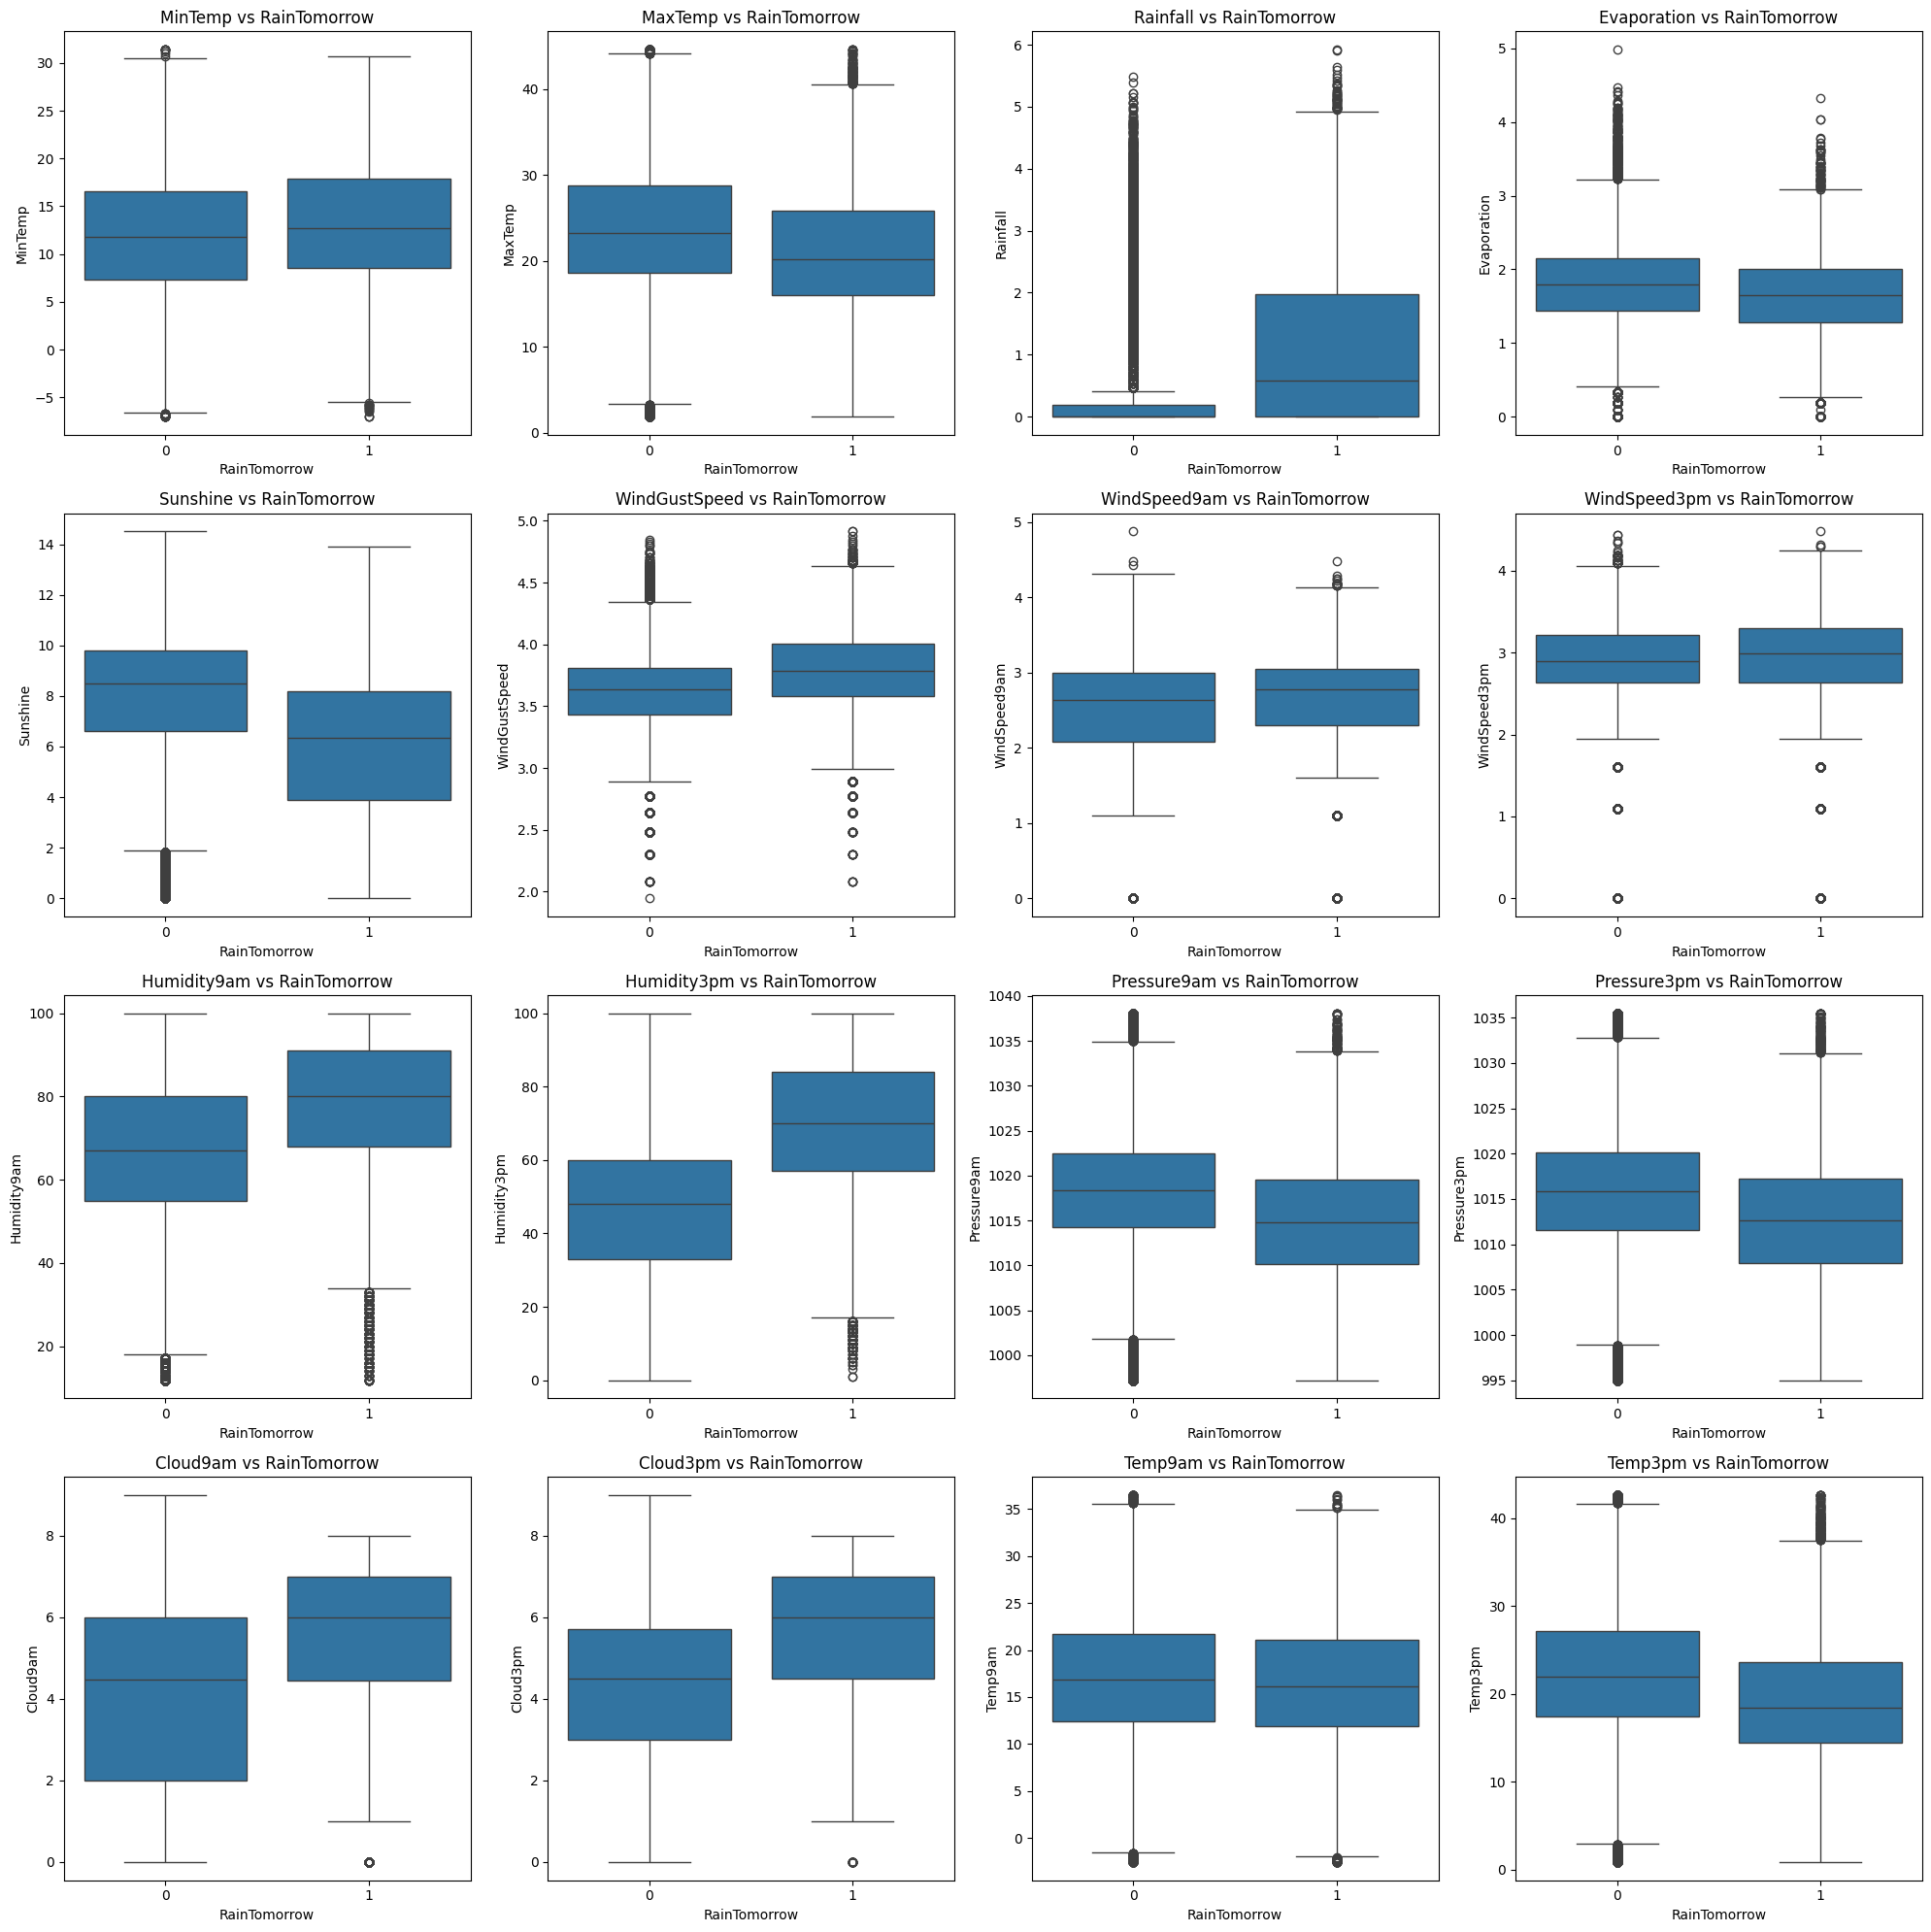

In [22]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                     'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                     'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
n_rows = 4
n_cols = 4

plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)  
    sns.boxplot(x='RainTomorrow', y=column, data=df)
    plt.title(f'{column} vs RainTomorrow')
    plt.xlabel('RainTomorrow')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Wartości w kolumnie months mieszczą się w zakresie od 1 do 12. Mają one cykliczny charakter. Chcemy pokazać, że miesiące 1 i 12 są w rzeczywistości blisko siebie.
Aby to osiągnąć, zastosujemy funkcje sinus i cosinus. Połączone razem pozwolą one lepiej odwzorować zależności i korelacje między miesiącami.

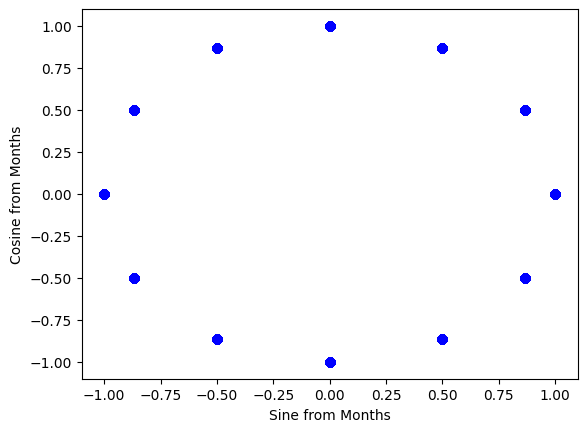

In [23]:
df['Month' + '_sin'] = np.sin(2 * np.pi * df['Month']/12)
df['Month' + '_cos'] = np.cos(2 * np.pi * df['Month']/12)

plt.scatter(df['Month_sin'], df['Month_cos'], c = 'blue')
plt.ylabel("Cosine from Months")
plt.xlabel("Sine from Months")
plt.show()

To samo z wiatrem.

In [24]:
wind_map = {
    'N': 1, 'NNE': 2, 'NE': 3, 'ENE': 4,
    'E': 5, 'ESE': 6, 'SE': 7, 'SSE': 8,
    'S': 9, 'SSW': 10, 'SW': 11, 'WSW': 12,
    'W': 13, 'WNW': 14, 'NW': 15, 'NNW': 16
}

df[['WindGustDir','WindDir9am','WindDir3pm']] = df[['WindGustDir','WindDir9am','WindDir3pm']].map(lambda x: wind_map.get(x, None))

In [25]:
def switch(df, col):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/16)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/16)
    return df

In [26]:
for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df = switch(df, col)

Zmieniamy kolumne "Location" na wspólrzędne geograficzne.

In [27]:
locations = df['Location']
print(locations.unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [28]:
data = {
    "Location": ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle',
                  'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport',
                  'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong',
                  'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne',
                  'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
                  'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera',
                  'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums',
                  'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine',
                  'Uluru'],
    "Latitude": [-36.0800, -33.9200, -31.4989, -30.2963, -29.4618, -32.9267,
                 -33.2810, -29.0408, -33.7511, -33.6000, -33.8688, -33.9399,
                 -35.1150, -32.7900, -34.4278, -35.2809, -35.4167,
                 -35.5290, -37.5622, -36.7587, -38.1080, -37.6690, -37.8136,
                 -34.1855, -36.3333, -38.3496, -37.7167, -37.9167, -27.4698, -16.9186,
                 -28.0167, -19.2589, -34.9285, -37.8318, -34.4680, -31.1990,
                 -35.0228, -34.0167, -31.6670, -31.9403, -31.9505, -32.9833,
                 -34.9750, -42.8821, -41.4388, -23.6980, -12.4634, -14.4650,
                 -25.3444],
    "Longitude": [146.9200, 150.7400, 145.8339, 153.1135, 149.8410, 151.7817,
                  151.5760, 167.9544, 150.6940, 150.7500, 151.2093, 151.1753,
                  147.3670, 151.8350, 150.8931, 149.1300, 149.0833,
                  148.7720, 143.8503, 144.2820, 147.0680, 144.8410, 144.9631,
                  142.1625, 141.6500, 141.6057, 145.0833, 141.2833, 153.0251, 145.7781,
                  153.4000, 146.8169, 138.6007, 140.7820, 138.9960, 136.8250,
                  117.8814, 115.1000, 116.0170, 115.9660, 115.8605, 121.6333,
                  116.7330, 147.3272, 147.1340, 133.8807, 130.8456, 132.2630,
                  131.0369]


}
locations_df = pd.DataFrame(data)
locations_df.head()

,Location,Latitude,Longitude
0,Albury,-36.0800,146.9200
1,BadgerysCreek,-33.9200,150.7400
2,Cobar,-31.4989,145.8339
3,CoffsHarbour,-30.2963,153.1135
4,Moree,-29.4618,149.8410


In [29]:
locations_df = locations_df.apply(lambda x: x.astype(int) if x.dtype == bool else x)

In [30]:
locations_df.head()

,Location,Latitude,Longitude
0,Albury,-36.0800,146.9200
1,BadgerysCreek,-33.9200,150.7400
2,Cobar,-31.4989,145.8339
3,CoffsHarbour,-30.2963,153.1135
4,Moree,-29.4618,149.8410


In [31]:
df = df.merge(locations_df, on='Location', how="left")

Usuwamy zbędne kolumny.

In [32]:
df = df.drop(['Date','Month','Location','WindGustDir','WindDir9am','WindDir3pm'], axis=1)

In [33]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Month_sin,Month_cos,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos,Latitude,Longitude
0,13.4,22.9,0.470004,2.202557,8.984512,3.806662,3.044522,3.218876,71.0,22.0,...,-2.449294e-16,1.0,-9.238795e-01,3.826834e-01,-9.238795e-01,3.826834e-01,-0.707107,7.071068e-01,-36.0800,146.9200
1,7.4,25.1,0.000000,2.202557,8.984512,3.806662,1.609438,3.135494,44.0,25.0,...,-2.449294e-16,1.0,-7.071068e-01,7.071068e-01,-2.449294e-16,1.000000e+00,-1.000000,-1.836970e-16,-36.0800,146.9200
2,12.9,25.7,0.000000,2.202557,8.984512,3.850148,2.995732,3.295837,38.0,30.0,...,-2.449294e-16,1.0,-1.000000e+00,-1.836970e-16,-9.238795e-01,3.826834e-01,-1.000000,-1.836970e-16,-36.0800,146.9200
3,9.2,28.0,0.000000,2.202557,8.984512,3.218876,2.484907,2.302585,45.0,16.0,...,-2.449294e-16,1.0,9.238795e-01,3.826834e-01,3.826834e-01,-9.238795e-01,0.923880,-3.826834e-01,-36.0800,146.9200
4,17.5,32.3,0.693147,2.202557,8.984512,3.737670,2.079442,3.044522,82.0,33.0,...,-2.449294e-16,1.0,-9.238795e-01,3.826834e-01,1.000000e+00,6.123234e-17,-0.382683,9.238795e-01,-36.0800,146.9200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,3.5,21.8,0.000000,1.258823,5.662452,3.465736,2.772589,2.639057,59.0,27.0,...,1.224647e-16,-1.0,9.238795e-01,-3.826834e-01,7.071068e-01,-7.071068e-01,0.923880,-3.826834e-01,-25.3444,131.0369
140783,2.8,23.4,0.000000,1.258823,5.662452,3.465736,2.639057,2.484907,51.0,24.0,...,1.224647e-16,-1.0,9.238795e-01,-3.826834e-01,3.826834e-01,-9.238795e-01,1.000000,6.123234e-17,-25.3444,131.0369
140784,3.6,25.3,0.000000,1.258823,5.662452,3.135494,2.639057,2.302585,56.0,21.0,...,1.224647e-16,-1.0,-2.449294e-16,1.000000e+00,3.826834e-01,-9.238795e-01,0.382683,9.238795e-01,-25.3444,131.0369
140785,5.4,26.9,0.000000,1.258823,5.662452,3.637586,2.302585,2.302585,53.0,24.0,...,1.224647e-16,-1.0,3.826834e-01,9.238795e-01,3.826834e-01,-9.238795e-01,-0.707107,7.071068e-01,-25.3444,131.0369


In [34]:
df.to_csv('weather_transformed.csv', index=False)
